-------

# Deep Learning Into

Deep Learning outperforms traditional machine learning by extracting intricate patterns from big and unstructured data such as image pixels, large corpora of text, audio signals.

* Traditional machine learning -> hand-crafted feature engineering
* Deep learning -> **feature learning** (**representation learning**) from raw data

Deep learning is a subset of machine learning where the model structure is: 
* inputs
* hidden layers (one or many)
* outputs 

The job of **hidden layers** is to get good features  
The job of **output layer** is to classify those features 

Hidden layers are a **black box** -> you do not need easily interpretable results (you do not care why the network knows it's a cat or a dog) 

Deep learning is inspired by how the human brain learns: through interconnected cells called neurons, hence the name "neural" networks.

These layered model structures require far more data to learn than other supervised learning models to derive patterns from the unstructured data - usually talking about at least hundreds of thousands of data points.

In [16]:
import torch

In [17]:
# Provides neural network wrapper
import torch.nn as nn

In [18]:
# Activation and loss functions 
import torch.nn.functional as F

In [19]:
# Optimizer of choice - Stochastic Gradient Descent
from torch.optim import SGD

In [20]:
# Graphs 
import matplotlib.pyplot as plt
import seaborn as sns

PyTorch shares a lot of commonalities with numpy and it also supports:
* image data with `torchvision`
* audio data with `torchaudio`
* text data with `torchtext`

The fundamental data structure in PyTorch is called a **tensor**. A tensor is essentially an array, which can support many mathematical operations, and will form a building block for our neural networks.

In [2]:
# Tensors can be created from Python lists
array = [[1, 2, 3], [4, 5, 6]]

In [3]:
tensor = torch.tensor (array)

In [4]:
tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [6]:
# PyTorch is similar in functionality to numpy which makes it easy to use both
import numpy as np

In [7]:
# Load from NumPy array 
np_array = np.array(array)
np_tensor = torch.from_numpy(np_array)

In [11]:
 tensor.shape

torch.Size([2, 3])

In [12]:
tensor.dtype

torch.int64

 Deep learning often requires a GPU, which, compared to a CPU, can offer parallel computing capabilities, faster training times, and better performance.

In [13]:
tensor.device

device(type='cpu')

---------

# Tensor operations 

In [14]:
a = torch.tensor([[1, 1],[2, 2]])
b = torch.tensor ([[2, 2],[3, 3]])

In [15]:
# Addition
a + b

tensor([[3, 3],
        [5, 5]])

In [16]:
# Subtraction
a - b

tensor([[-1, -1],
        [-1, -1]])

In [17]:
# Element-wise multiplication
a * b

tensor([[2, 2],
        [6, 6]])

Other operations: 
* transposition 
* matrix multiplication 
* concatenation

In [295]:
# Create a matrix of ones with shape 3 by 3
tensor_of_ones = torch.ones(3, 3)

# Create an identity matrix with shape 3 by 3
identity_tensor = torch.eye(3)

# Do a matrix multiplication of tensor_of_ones with identity_tensor
matrices_multiplied = torch.matmul(tensor_of_ones, identity_tensor)
print(matrices_multiplied)

# Do an element-wise multiplication of tensor_of_ones with identity_tensor
element_multiplication = tensor_of_ones * identity_tensor
print(element_multiplication)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


------------

# Smallest Neural Network

In [300]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate all 2 linear layers  
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
      
        # Use the instantiated layers and return x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

No hidden layers, just input and output 

In [21]:
import torch.nn as nn 

In [22]:
# Create first layer -  one row with three "features" or "neurons"
input_tensor = torch.tensor(
    [[0.3471, 0.4547, -0.2356]]
)

In [23]:
# Next layer - a linear layer - takes an input, applies a linear function, and returns output
linear_layer = nn.Linear(in_features=3, out_features=2)

In [24]:
# Pass input_tensor to linear_layer to generate an output.
output = linear_layer(input_tensor)

In [25]:
# Output is a tensor with the number of features that we designated
output

tensor([[-0.4975, -0.2546]], grad_fn=<AddmmBackward0>)

Each linear layer has a set of **weights** and **biases** associated with it:

In [27]:
linear_layer.weight

Parameter containing:
tensor([[-0.5042, -0.4743,  0.1546],
        [-0.2103,  0.4613, -0.4945]], requires_grad=True)

In [28]:
linear_layer.bias

Parameter containing:
tensor([-0.0704, -0.5078], requires_grad=True)

Linear layer operation: 
$$ output = W_0   @   input + b_0 $$
where @ operator denotes a matrix multiplication. 

Weights and biases are initialized randomly. They are not useful until they are tuned

Networks with only linear layers are called **fully connected** because each neuron in one layer is connected to each neuron in the next layer

----------

In [21]:
## create a neural network class by creating a class that inherits from nn.Module.
class BasicNN(nn.Module):

    def __init__(self): # __init__() is the class constructor function, and we use it to initialize the weights and biases.
        
        super().__init__() # initialize an instance of the parent class, nn.Model.
        
        ## Now create the weights and biases that we need for our neural network.
        ## Each weight or bias is an nn.Parameter, which gives us the option to optimize the parameter by setting
        ## requires_grad, which is short for "requires gradient", to True. Since we don't need to optimize any of these
        ## parameters now, we set requires_grad=False.
        ##
        ## NOTE: Because our neural network is already fit to the data, we will input specific values
        ## for each weight and bias. In contrast, if we had not already fit the neural network to the data,
        ## we might start with a random initalization of the weights and biases.
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
        
    def forward(self, input): ## forward() takes an input value and runs it though the neural network 
                              ## illustrated at the top of this notebook. 
        
        ## the next three lines implement the top of the neural network (using the top node in the hidden layer).
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        ## the next three lines implement the bottom of the neural network (using the bottom node in the hidden layer).
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ## here, we combine both the top and bottom nodes from the hidden layer with the final bias.
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
    
        return output # output is the predicted effectiveness for a drug dose.

In [22]:
## create the neural network. 
model = BasicNN()

## print out the name and value for each parameter
for name, param in model.named_parameters():
    print(name, param.data)

w00 tensor(1.7000)
b00 tensor(-0.8500)
w01 tensor(-40.8000)
w10 tensor(12.6000)
b10 tensor(0.)
w11 tensor(2.7000)
final_bias tensor(-16.)


In [23]:
## now create the different doses we want to run through the neural network.
## torch.linspace() creates the sequence of numbers between, and including, 0 and 1.
input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Text(0.5, 0, 'Dose')

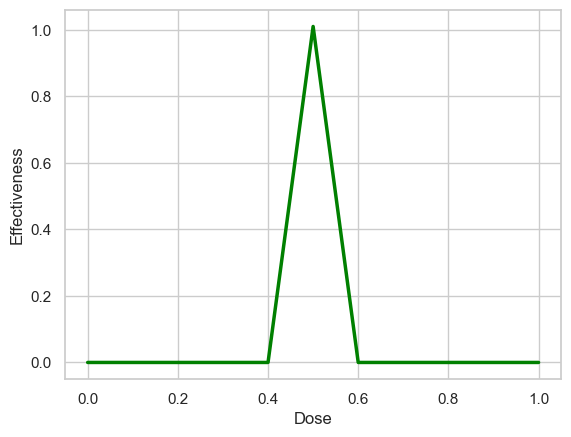

In [24]:
## create the neural network. 
model = BasicNN() 

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values, 
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## optionally, save the graph as a PDF.
# plt.savefig('BasicNN.pdf')

# Neural Network with Multiple Layers

In [34]:
# Create network with three linear layers using Sequential container
model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear (18, 20), # takes the 18 from the first layer
    nn.Linear (20, 5) # takes 20 from the second layer
)

In [37]:
input_tensor = torch.tensor([[-0.0014,  0.4038,  1.0305,  0.7521, 0.7489, -0.3968,  0.0113, -1.3844, 0.8705, -0.9743]])

In [43]:
input_tensor

tensor([[-0.0014,  0.4038,  1.0305,  0.7521,  0.7489, -0.3968,  0.0113, -1.3844,
          0.8705, -0.9743]])

In [44]:
# Pass input_tensor to model to obtain output
output_tensor = model(input_tensor)

In [45]:
# Output is still not yet meaningful as the weights and biases are not tuned
output_tensor

tensor([[ 0.1910, -0.2748, -0.1261,  0.1329,  0.1232]],
       grad_fn=<AddmmBackward0>)

In [25]:
# Now optimizing with backpropagation 
## create a neural network by creating a class that inherits from nn.Module.
## NOTE: This code is the same as before, except we changed the class name to BasicNN_train and we modified 
##       final_bias in two ways:
##       1) we set the value of the tensor to 0, and
##       2) we set "requires_grad=True".
class BasicNN_train(nn.Module):

    def __init__(self): # __init__ is the class constructor function, and we use it to initialize the weights and biases.
        
        super().__init__() # initialize an instance of the parent class, nn.Module.
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        ## we want to modify final_bias to demonstrate how to optimize it with backpropagation.
        ## The optimal value for final_bias is -16...
#         self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        ## ...so we set it to 0 and tell Pytorch that it now needs to calculate the gradient for this parameter.
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True) 
        
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
    
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

Requires gradient set to True tells PyTorch that we need to optimize this specific parameter 

Text(0.5, 0, 'Dose')

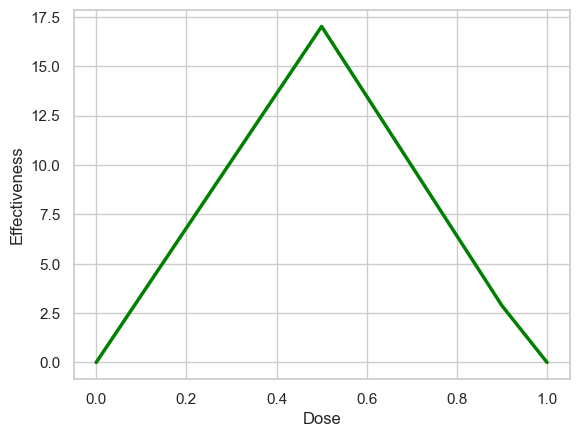

In [26]:
## create the neural network. 
model = BasicNN_train() 

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values.detach(), ## NOTE: because final_bias has a gradident, we call detach() 
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BasicNN_train.pdf')

In [27]:
## create the training data for the neural network.
inputs = torch.tensor([0., 0.5, 1.]) # x 
labels = torch.tensor([0., 1., 0.]) # observed values or y 

In [28]:
## create the neural network we want to train.
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.1) ## here we're creating an optimizer to train the neural network.
                                            ## NOTE: There are a bunch of different ways to optimize a neural network.
                                            ## In this example, we'll use Stochastic Gradient Descent (SGD). However,
                                            ## another popular algortihm is Adam (which will be covered in a StatQuest).

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

Final bias, before optimization: tensor(0.)



In [29]:
## this is the optimization loop. Each time the optimizer sees all of the training data is called an "epoch".
for epoch in range(100):
        
    ## we create and initialize total_loss for each epoch so that we can evaluate how well model fits the
    ## training data. At first, when the model doesn't fit the training data very well, total_loss
    ## will be large. However, as gradient descent improves the fit, total_loss will get smaller and smaller.
    ## If total_loss gets really small, we can decide that the model fits the data well enough and stop
    ## optimizing the fit. Otherwise, we can just keep optimizing until we reach the maximum number of epochs. 
    total_loss = 0
    
    ## this internal loop is where the optimizer sees all of the training data and where we 
    ## calculate the total_loss for all of the training data.
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration] ## extract a single input value (a single dose)...
        label_i = labels[iteration] ## ...and its corresponding label (the effectiveness for the dose).
        
        output_i = model(input_i) ## calculate the neural network output for the input (the single dose).
        
        loss = (output_i - label_i)**2 ## calculate the loss for the single value.
                                       ## NOTE: Because output_i = model(input_i), "loss" has a connection to "model"
                                       ## and the derivative (calculated in the next step) is kept and accumulated
                                       ## in "model".
        
        loss.backward() # backward() calculates the derivative for that single value and adds it to the previous one.
        
        total_loss += float(loss) # accumulate the total loss for this epoch.
        
        
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
      
    optimizer.step() ## take a step toward the optimal value.
    optimizer.zero_grad() ## This zeroes out the gradient stored in "model". 
                          ## Remember, by default, gradients are added to the previous step (the gradients are accumulated),
                          ## and we took advantage of this process to calculate the derivative one data point at a time.
                          ## NOTE: "optimizer" has access to "model" because of how it was created with the call 
                          ## (made earlier): optimizer = SGD(model.parameters(), lr=0.1).
                          ## ALSO NOTE: Alternatively, we can zero out the gradient with model.zero_grad().
    
    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")
    ## now go back to the start of the loop and go through another epoch.

print("Total loss: " + str(total_loss))
print("Final bias, after optimization: " + str(model.final_bias.data))

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Final Bias: tensor(-15.8919)

Step: 22 Final Bias: tensor(-15.9155)

Step: 23 Final Bias: tensor(-15.9344)

Step: 24 Final Bias: tensor(-15.9495)

Step: 25 Final Bias: tensor(-15.9616)



`loss.backward()` accumulates the derivatives each time we go through the nested loop 

Text(0.5, 0, 'Dose')

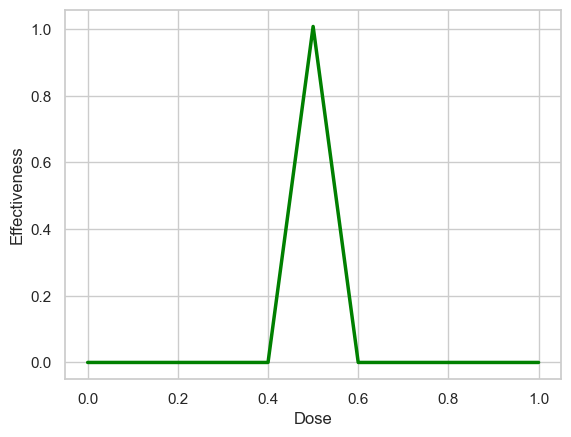

In [30]:
## run the different doses through the neural network
output_values = model(input_doses)

## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values.detach(), ## NOTE: we call detach() because final_bias has a gradient
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BascNN_optimized.pdf')

-------

# Discovering activation functions

**Stacked linear operations**:
* Each linear layer multiplies its respective input with layer weights and adds biases
* Even with multiple stacked linear layers, output still has linear relationship with input

**Activation functions**
* Add non-linearity to the network
* A model can learn more complex relationships with non-linearity
* The output will no longer be a linear function of the input

**e** is approximately equal to 2.71828 and is the base of natural logarithms.

Examples: 
* Sigmoid - e^x/(e^x+1)
* tanh
* ReLU - max(x, 0)
* Leaky ReLU
* Maxout
* Softmax
* ELU
* Softplus - log(1+e^x)

The **Softplus** activation function is a smooth approximation to the ReLU (Rectified Linear Unit) function.

In [15]:
import torch
import torch.nn.functional as F

# Define custom parameters
beta = 2   # Scale factor -> Larger beta makes curve steeper
threshold = 15  # Threshold for stability -> Prevents exponential overflow

# Applying Softplus with custom parameters
y = F.softplus(x, beta=beta, threshold=threshold)
print(y)

tensor([0.0635, 0.3466, 1.0635, 2.0091])


In [14]:
import torch
import torch.nn as nn

# Define a model or layer with Softplus
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.softplus = nn.Softplus()

    def forward(self, x):
        return self.softplus(x)

# Example tensor
x = torch.tensor([-1.0, 0.0, 1.0, 2.0])

# Apply the model or layer
model = MyModel()
y = model(x)
print(y)

tensor([0.3133, 0.6931, 1.3133, 2.1269])


The output of the last linear layer is the **pre-activation output**, which would be pass to activation functions to obtain **transformed output**.

**Sigmoid function**:
* used in binary classification
* the output of the sigmoid is passed through the common threshold (0.5) to classify as 0 or 1

In [53]:
input_tensor = torch.tensor([[-0.0014,  0.4038,  1.0305,  0.7521, 0.7489, -0.3968]])

In [55]:
# Instantiate the activation function
sigmoid = nn.Sigmoid()

In [56]:
# Sigmoid as last step in network of linear layers is equivalent to traditional logistic regression.
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer 
    nn.Linear(4, 1), # Second linear layer 
    nn.Sigmoid() # Sigmoid activation function
)

In [57]:
output = model(input_tensor)

In [58]:
output

tensor([[0.4378]], grad_fn=<SigmoidBackward0>)

**Softmax**: 
* used for multi-class classification problems
* outputs N elements equal to softmax N elements
* outputs a probability distribution
    * each element is a probability (it's bounded between 0 and 1)
    * the prediction is the class with the highest probability
    * the sum of the output vector is equal to 1

In [59]:
# Create an input tensor
input_tensor = torch.tensor(
    [[4.3, 6.1, 2.3]])

In [60]:
# Apply softmax along the last dimension
probabilities = nn.Softmax(dim=-1)
output_tensor = probabilities(input_tensor)

In [65]:
output_tensor

tensor([[0.1392, 0.8420, 0.0188]])

In [64]:
# All the probabilities are summed to 1
output_tensor.sum()

tensor(1.)

Similar to sigmoid, softmax can be the last layer in nn.Sequential container:

In [71]:
input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

In [72]:
# Update network below to perform a multi-class classification with four labels
model = nn.Sequential(
  nn.Linear(11, 20),
  nn.Linear(20, 12),
  nn.Linear(12, 6),
  nn.Linear(6, 4), 
  nn.Softmax(dim=-1)
)

In [73]:
output = model(input_tensor)

In [74]:
output

tensor([[0.3869, 0.1211, 0.3253, 0.1667]], grad_fn=<SoftmaxBackward0>)

In [75]:
output.sum()

tensor(1.0000, grad_fn=<SumBackward0>)

--------

# Forward pass

Neural networks are **computational graphs**

* Input data is **passed forward** or **propagated** through a network 
* Computations performed at each layer
* Outputs of each layer passed to each subsequent layer
* Output of final layer -> **prediction** 
* Used for both training and prediction

Possible outcomes: 
* binary classification
* multiclass classification
* regression

**Backward pass** or **backpropagation** is used to update weights and biasses during training:   
The derivatives are calculated in PyTorch using the reverse mode of audto-differentiation
1. Propagate data forward
2. Compare outputs to true values
3. Backpropagate to update model weights and biases
4. Repeat until weights and biases are tuned to produce useful output 

In [297]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

# Set q to sum of x and y, set f to product of q with z
q = x + y
f = q * z

# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

Gradient of x is: tensor(5.)
Gradient of y is: tensor(5.)
Gradient of z is: tensor(1.)


In [77]:
# Create input data of shape 5x6
input_data = torch.tensor(
         [[-0.4421,  1.5207,  2.0607, -0.3647,  0.4691,  0.0946],
         [-0.9155, -0.0475, -1.3645,  0.6336, -1.9520, -0.3398],
         [ 0.7406,  1.6763, -0.8511,  0.2432,  0.1123, -0.0633],
         [-1.6630, -0.0718, -0.1285,  0.5396, -0.0288, -0.8622],
         [-0.7413,  1.7920, -0.0883, -0.6685,  0.4745, -0.4245]])

In [80]:
# Create binary classification model
model = nn.Sequential(
   nn.Linear(6, 4), # First linear layer
   nn.Linear(4, 1), # Second linear layer
   nn.Sigmoid() # Sigmoid activation function
)

In [81]:
# Pass input data through model
output = model(input_data)

In [82]:
# 5x1 -> everything that is over 0.5 to be Class 1 and the rest Class 0
output # The output is worthless without the backpropagation to update the weights and biases

tensor([[0.6231],
        [0.3340],
        [0.3838],
        [0.5316],
        [0.4841]], grad_fn=<SigmoidBackward0>)

In [83]:
# Specify model has three classes
n_classes = 3

In [84]:
# Create multiclass classification model
model = nn.Sequential(
   nn.Linear(6, 4), # First linear layer
   nn.Linear(4, n_classes), # Second linear layer
   nn.Softmax(dim=-1) # Softmax activation
)

In [85]:
# Pass input data through model
output = model(input_data)

In [86]:
# Each row sums to one
output

tensor([[0.4052, 0.2676, 0.3272],
        [0.1850, 0.3362, 0.4788],
        [0.2383, 0.3374, 0.4244],
        [0.3149, 0.2976, 0.3875],
        [0.3193, 0.2929, 0.3878]], grad_fn=<SoftmaxBackward0>)

In [87]:
# Value with highest probability is assigned predicted label in each row
output.shape

torch.Size([5, 3])

In [89]:
# Create regression model
model = nn.Sequential(
   nn.Linear(6, 4), # First linear layer
   nn.Linear(4, 1) # Second linear layer
) # No activation function

In [90]:
# Pass input data through model
output = model(input_data)

In [91]:
# The exact value prediction
output

tensor([[ 0.0101],
        [ 0.5466],
        [ 0.1231],
        [ 0.2389],
        [-0.0445]], grad_fn=<AddmmBackward0>)

--------

# Loss function

* Gives feedback to model during training
* Takes in model prediction $\hat{y}$ and ground truth $y$
* Outputs a float:
    * Correct prediction -> low loss
    * Incorrect prediction -> high loss 

For regression -> **least squared loss**  
For classification -> **soft-max cross-entropy loss**  
More complicated problems (object detection) are using more complicated loss 

Loss functions are used rather than just accuracy because they are **differentiable**

$$ loss = F(y, \hat{y}) $$

* $y$ is a single integer (class label)
* $\hat{y}$ is a tensor (output of softmax)

To compare an integer with a tensor of order one, use **one-hot encoding**:
* create a binary vector where the ground truth gets *True* while the rest of the values are *False*

In [94]:
import torch.nn.functional as F

In [96]:
# Assuming the first class is the ground truth for the tensor 
F.one_hot(torch.tensor(0), num_classes = 3)

tensor([1, 0, 0])

**Cross entropy loss** in PyTorch is the most used loss function for the classification problems 

In [404]:
from torch.nn import CrossEntropyLoss

In [405]:
# Scores are model predictions before the final softmax function
scores = torch.tensor([[-0.1211,  0.1059]])

In [406]:
# One hot encoded ground truth label
one_hot_target = torch.tensor([[1, 0]])

In [407]:
# Instantiate the loss function
criterion = CrossEntropyLoss()

In [408]:
# Produce the loss values 
criterion(scores.double(), one_hot_target.double())

tensor(0.8131, dtype=torch.float64)

In [409]:
y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

In [410]:
# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), num_classes = scores.shape[1])

In [411]:
one_hot_label

tensor([[0, 0, 1, 0]])

In [412]:
# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

In [413]:
# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())

In [414]:
loss

tensor(8.0619, dtype=torch.float64)

----

# Using Derivatives 

**Gradient** is the term for derivatives used in deep learning. 

A gradient tells us how much the loss would change if we slightly modify a particular weight or bias.

The gradient points in the direction of the steepest increase of the loss function. Therefore, to minimize the loss, the model's parameters are updated in the opposite direction of the gradient. This is why the method is called **gradient descent**.

The magnitude of the gradient influences the size of the steps taken in the parameter space. A larger gradient might indicate a steep slope where significant improvements can be made, leading to larger steps. 

Backpropagation is used to compute these gradients. 

Backpropagation concepts: 
* Calculate local gradients for L0, L1 and LN using backpropagation
* Calculate loss gradients with respect to LN, then use LN gradients to calculate LN-1 gradients, and so on till reaching L0

In [120]:
sample = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]])

In [121]:
# Create the model and run a forward pass
model = nn.Sequential(nn.Linear(16, 8),
                   nn.Linear(8, 4),
                   nn.Linear(4, 2))

In [122]:
prediction = model(sample)

In [123]:
prediction

tensor([[2.1613, 2.0922]], grad_fn=<AddmmBackward0>)

In [125]:
# Calculate the loss and compute the gradients
criterion = CrossEntropyLoss()

In [ ]:
loss = criterion(prediction, target)
loss.backward()

In [ ]:
# Access each layer's gradients
model[0].weight.grad, model[0].bias.grad
model[1].weight.grad, model[1].bias.grad
model[2].weight.grad, model[2].bias.grad

In [128]:
# Manually update the weights by subtracting local gradients scaled by the learning rate
# Learning rate is typically small
lr = 0.001

-------

**Convex** function -> one local minimum == global minimum  
**Non-convex** function -> multiple local minima

Loss functions used in deep learning are **NOT** convex  
For non-convex functions, iterative process such as gradient descent is used  
In PyTorch, an **optimizer** takes care of weight updates  
The most common optimizer is stochastic gradient descent (SGD)  

In [131]:
import torch.optim as optim

In [132]:
 # Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [133]:
# Optimizer handles updating model parameters (or weights) after calculation of local gradients

In [134]:
optimizer.step()

A critical part of training PyTorch models is to calculate gradients of the weight and bias tensors with respect to a loss function.

In [168]:
preds = torch.tensor([[1.3822, 1.0100]])

In [169]:
target = torch.tensor([[1., 0.]])

In [142]:
bias = torch.tensor([-0.6617, -1.0373])

In [143]:
weight = torch.tensor([[ 1.2630,  0.9749,  0.5577,  0.4896,  0.4237, -0.5220, -0.4037,  0.9209,
         -0.1666],
        [1.4096,  0.2154,  0.2460,  2.5087,  1.5676,  0.9976, -1.5033,  0.2270,
         -0.8001]])

In [144]:
criterion = nn.CrossEntropyLoss()

In [145]:
# Calculate the loss
loss = criterion(preds, target)

In [146]:
loss

tensor(0.5243)

In [148]:
# Display gradients of the weight and bias tensors in order
print(weight.grad)
print(bias.grad)

None
None


In [149]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Sigmoid(),
                      nn.Linear(8, 2))

Each layer parameter can be accessed by indexing the created model directly

In [156]:
# Access the weight of the first linear layer
weight_0 = model[0].weight

In [162]:
weight_0

Parameter containing:
tensor([[-0.1402,  0.0082,  0.0404,  0.1229, -0.1140,  0.1675, -0.1319,  0.1233,
         -0.0673, -0.1484,  0.0642,  0.2357, -0.0714,  0.1308,  0.1764,  0.1410],
        [-0.0011, -0.1917, -0.1992, -0.0559,  0.0513,  0.2279,  0.1319,  0.1533,
          0.0806,  0.2045,  0.1577,  0.1492,  0.0729,  0.1653,  0.1133,  0.0428],
        [-0.1938,  0.0097,  0.0279,  0.0908, -0.0907, -0.1991,  0.0864,  0.1462,
         -0.1461, -0.1680,  0.1509, -0.0076,  0.2454, -0.0143,  0.0187, -0.1407],
        [-0.2279,  0.0637,  0.1996, -0.0499, -0.0177, -0.0644,  0.0366,  0.1378,
         -0.2217,  0.1801,  0.0165,  0.2362, -0.1251, -0.0148, -0.0759,  0.0861],
        [-0.0338, -0.1130,  0.0052,  0.1851, -0.1426, -0.0204, -0.0702,  0.0642,
          0.0680, -0.1035, -0.2240, -0.0530, -0.1464, -0.1871, -0.1343,  0.2128],
        [-0.0961, -0.0782, -0.1108, -0.0920,  0.0109,  0.0672, -0.1494, -0.0396,
          0.0363, -0.0523, -0.1537,  0.1493,  0.2103,  0.0538,  0.1044,  0.0685],


In [153]:
# Access the bias of the second linear layer
bias_1 = model[2].bias

In [154]:
bias_1

Parameter containing:
tensor([-0.1040, -0.3191], requires_grad=True)

In [160]:
# Access the gradients of the weight of each linear layer
grads0 = weight_0.grad

In [161]:
grads0

In [165]:
# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [171]:
# Update the model's parameters using the optimizer
optimizer.step()

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define a simple linear model
model = nn.Linear(in_features=1, out_features=1)

# 2. Define a loss function
loss_function = nn.MSELoss()

# 3. Create an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Create dummy data
x = torch.randn(10, 1)  # 10 random input values
y = 2 * x + 3  # a simple linear relationship with some noise

# 5. Training loop
for epoch in range(100):  # 20 iterations
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = loss_function(y_pred, y)
    print(f'Epoch {epoch}, Loss: {loss.item()}')

    # Backward pass: Compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

Epoch 0, Loss: 15.425226211547852
Epoch 1, Loss: 14.664009094238281
Epoch 2, Loss: 13.94487190246582
Epoch 3, Loss: 13.265230178833008
Epoch 4, Loss: 12.622669219970703
Epoch 5, Loss: 12.01494026184082
Epoch 6, Loss: 11.439940452575684
Epoch 7, Loss: 10.895700454711914
Epoch 8, Loss: 10.380388259887695
Epoch 9, Loss: 9.892281532287598
Epoch 10, Loss: 9.429779052734375
Epoch 11, Loss: 8.991376876831055
Epoch 12, Loss: 8.575669288635254
Epoch 13, Loss: 8.181343078613281
Epoch 14, Loss: 7.807163238525391
Epoch 15, Loss: 7.4519829750061035
Epoch 16, Loss: 7.11471700668335
Epoch 17, Loss: 6.794353485107422
Epoch 18, Loss: 6.489943027496338
Epoch 19, Loss: 6.200596809387207
Epoch 20, Loss: 5.925478935241699
Epoch 21, Loss: 5.663807392120361
Epoch 22, Loss: 5.414844036102295
Epoch 23, Loss: 5.17789888381958
Epoch 24, Loss: 4.952323913574219
Epoch 25, Loss: 4.737505912780762
Epoch 26, Loss: 4.5328755378723145
Epoch 27, Loss: 4.337891578674316
Epoch 28, Loss: 4.152045726776123
Epoch 29, Loss: 3

Training a neural network
1. Create a model
2. Choose a loss function
3. Create a dataset
4. Define an optimizer
5. Run a training loop, where for each sample of the dataset, we repeat:
    * Calculating loss (forward pass) 
    * Calculating local gradients 
    * Updating model parameters

# Mean Squared Error Loss

* MSE loss is the squared difference between the prediction and the ground truth.
* Used for the regression problems since **cross entropy loss** is used in classification problems.

In [190]:
y_hat = np.array(10)
y = np.array(1)

# Calculate the MSELoss using NumPy
mse_numpy = np.mean((y_hat - y)**2)

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_hat).float(), torch.tensor(y).float())
print(mse_pytorch)

tensor(81.)


In [177]:
criterion = nn.MSELoss()

In [178]:
# Prediction and target are float tensors
loss = criterion(prediction, target)

In [179]:
loss

tensor(2.8630, grad_fn=<MseLossBackward0>)

In [415]:
# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(0.0117)


------

# Training loop

In scikit-learn, the whole training loop is contained in the .fit() method, but in PyTorch the loop is implemented manually.

In [187]:
from torch.utils.data import TensorDataset, DataLoader

In [184]:
# Create the model
model = nn.Sequential(nn.Linear(4, 2),
                   nn.Linear(2, 1))

In [185]:
# Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

**Epoch** is looping through the entire dataset once and the training is usually done over multiple epochs

In [ ]:
# Loop through the dataset multiple times
for epoch in range(num_epochs):
 for data in dataloader:
     # Set the gradients to zero
     optimizer.zero_grad()
     # Get feature and target from the data loader
     feature, target = data
     # Run a forward pass
     pred = model(feature)
     # Compute loss and gradients
     loss = criterion(pred, target)
     # Call the backpropagation to calculate the gradients with respect to weight and bias
     loss.backward()
     # Update the parameters
     optimizer.step()
show_results(model, dataloader)

---------

# Activation functions between layers 

* **sigmoid** and **softmax** functions are applied at the last linear layer of the model
* **ReLU** and **leaky ReLU** are applied between the linear layers

Sigmoid functions:
* Bounded between 0 and 1
* Can be used anywhere in the network

Gradients:
* Approach zero for low and high values of x (since gradients are the derivatives of the sigmoid)
* Cause function to **saturate** (since each local gradient is a function of the previous gradient)

Sigmoid function saturation can lead to **vanishing gradients** during backpropagation. This is also a problem for softmax.

# ReLU

Rectified Linear Unit (ReLU):
$$ f(x) = max(x, 0) $$
* for positive inputs, the output is equal to the input
* for strictly negative inputs, the output is equal to zero
* overcomes the vanishing gradients problem
* has the inconvenience of outputting NULL values for negative inputs and therefore, having null gradients. Once an element of the input is negative, it will be set to zero for the rest of the training

In [ ]:
# Instantiate non-linearity
relu = nn.ReLU()

# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

# Apply non-linearity to the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

# Leaky ReLU

* for positive inputs, it behaves similarly to ReLU
* for negative inputs, it multiplies the input by a small coefficient - **negative slope** (defaulted to 0.01)
* the gradients for negative inputs are never null
* overcomes NULL ReLU gradients that were created because of the negative values by using a multiplying factor for negative inputs

In [196]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

In [205]:
# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True) # Since the input is negative, the rectified version would convert this to 0
y = relu_pytorch(x)
y.backward()

In [202]:
# Getting the gradient of the ReLU function for x
gradient = x.grad
gradient

tensor(0.)

In [203]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

In [208]:
y = leaky_relu_pytorch(x)

In [209]:
y.backward()

In [210]:
# Getting the gradient of the Leaky ReLU function for x
gradient = x.grad
gradient

tensor(0.0500)

-----------

# Neural Network Architecture

A neuron of a linear layer:
* computes a linear operation using all neurons of previous layer
* contains $N+1$ learnable parameters, where $N$ = dimension of previous layer's outputs

Input and output layers dimensions are fixed:
* input layer depends on the `n_features` 
* output layer depends on the `n_classes`

* a model can have an arbitrary number of hidden layers
* increasing the number of parameters = increasing the **model capacity**
* capacity is measured by `n_parameters`

In [214]:
model

Sequential(
  (0): Linear(in_features=4, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [213]:
total = 0

for parameter in model.parameters():
 total += parameter.numel()
print(total)

13


In [217]:
def calculate_capacity(model):
    """Calculates the capacity of the model"""
    total = 0
    
    for p in model.parameters():
        total += p.numel()
        return total

--------

# Learning rate and momentum

Training a neural network = *solving an optimization problem*  
Two parameters of an optimizer can be adjusted when training a model:
* **learning rate**:
    * controls the step size
    * too small leads to long training times
    * too high leads to poor performances as optimizer steps jump across the chart
    * typical values between $10^{-2}$ and $10^{-4}$ 
* **momentum**:
    * controls the inertia of the optimizer
    * NULL can lead to the optimizer being stuck at a local minimum
    * non-NULL can help find the function minimum
    * typical values are between $0.85$ and $0.99$

In [219]:
# Stochastic Gradient Descent (SGD) optimizer
sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

------

# Layer initialization

* Layer weights are initialized to small values
* Layer outputs can explode if inputs and weights are not normalized
* Weights can be initialized using different methods (e.g., with a uniform distribution)

In [220]:
layer = nn.Linear(64, 128)

In [221]:
layer.weight.min()

tensor(-0.1250, grad_fn=<MinBackward1>)

In [222]:
layer.weight.max()

tensor(0.1250, grad_fn=<MaxBackward1>)

In [223]:
# Initialize layer weights with uniform distribution
nn.init.uniform_(layer.weight)

Parameter containing:
tensor([[0.8373, 0.9833, 0.9643,  ..., 0.6866, 0.0952, 0.7478],
        [0.4544, 0.9587, 0.6913,  ..., 0.8510, 0.1798, 0.6685],
        [0.0791, 0.5167, 0.8288,  ..., 0.2929, 0.6326, 0.9775],
        ...,
        [0.5602, 0.6386, 0.9596,  ..., 0.5102, 0.0688, 0.2611],
        [0.4220, 0.9637, 0.7851,  ..., 0.4229, 0.4175, 0.3334],
        [0.9042, 0.7915, 0.4723,  ..., 0.0586, 0.6882, 0.4989]],
       requires_grad=True)

In [225]:
layer.weight.min()

tensor(4.6074e-05, grad_fn=<MinBackward1>)

In [226]:
layer.weight.max()

tensor(1.0000, grad_fn=<MaxBackward1>)

In [232]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

**Transfer learning** - reusing a model trained on a first task for a second similar task, to accelerate the training process.

In [227]:
torch.save(layer, 'layer.pth')

In [228]:
new_layer = torch.load('layer.pth')

**Fine-tuning** is a type of transfer learning:
* smaller learning rate
* not every layer is trained (some of them are being frozen)
* Rule of thumb: freeze early layers of network and fine-tune layers closer to output layer

In [229]:
model = nn.Sequential(nn.Linear(64, 128),
                       nn.Linear(128, 256))

In [230]:
for name, param in model.named_parameters():
 if name == '0.weight':
     param.requires_grad = False

**Fine-tuning** steps:
1. Find a model trained on a simila task 
2. Load pre-trained weights
3. Freeze (or not) some of the layers in the model
4. Train with a smaller learning rate
5. Look at the loss values to see if the learning rate needs adjustments 

In [231]:
for name, param in model.named_parameters():
  
    # Check if the parameters belong to the first layer
    if name == '0.weight' or name == '0.bias':
   
        # Freeze the parameters
        param.requires_grad = False
        
    # Check if the parameters belong to the second layer
    if name == '1.weight' or name == '1.bias':
      
        # Freeze the parameters
        param.requires_grad = False

------

# Loading data

In [233]:
import pandas as pd
from io import StringIO

# Data provided as a string
data_str = """animal_name,hair,feathers,eggs,milk,predator,fins,legs,tail,type
skimmer,0,1,1,0,1,0,2,1,2
gull,0,1,1,0,1,0,2,1,2
seahorse,0,0,1,0,0,1,0,1,4
tuatara,0,0,1,0,1,0,4,1,3
squirrel,1,0,0,1,0,0,2,1,1"""

# Use StringIO to convert string data to a file-like object
data = StringIO(data_str)

# Create the DataFrame
df = pd.read_csv(data)

df.head()

,animal_name,hair,feathers,eggs,milk,predator,fins,legs,tail,type
0,skimmer,0,1,1,0,1,0,2,1,2
1,gull,0,1,1,0,1,0,2,1,2
2,seahorse,0,0,1,0,0,1,0,1,4
3,tuatara,0,0,1,0,1,0,4,1,3
4,squirrel,1,0,0,1,0,0,2,1,1


Type key: 
* (1) mammal 
* (2) bird
* (3) reptile
* (4) fish
* (5) amphibian
* (6) bug
* (7) invertebrate

In [238]:
animals = df.copy()

In [239]:
animals[animals.columns[1:-1]]

,hair,feathers,eggs,milk,predator,fins,legs,tail
0,0,1,1,0,1,0,2,1
1,0,1,1,0,1,0,2,1
2,0,0,1,0,0,1,0,1
3,0,0,1,0,1,0,4,1
4,1,0,0,1,0,0,2,1


In [248]:
# Define input features
features = animals[animals.columns[1:-1]]
X = np.array(features.astype(float))

In [249]:
X

array([[0., 1., 1., 0., 1., 0., 2., 1.],
       [0., 1., 1., 0., 1., 0., 2., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 4., 1.],
       [1., 0., 0., 1., 0., 0., 2., 1.]])

In [250]:
# Define target features (ground truth)
target = animals[animals.columns[-1]]
y = np.array(target).astype(float)

In [251]:
y

array([2., 2., 4., 3., 1.])

In [252]:
# Instantiate dataset class
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [257]:
# Access an individual sample
sample = dataset[0]
input_sample, label_sample = sample
print('input sample:', input_sample)
print('label_sample:', label_sample)

input sample: tensor([0., 1., 1., 0., 1., 0., 2., 1.])
label_sample: tensor(2.)


In [259]:
# Batch size determines how many samples are taken from the dataset per iteration
batch_size = 2
# Shuffle parameter tells the dataloader to shuffle the data on each iteration
shuffle = True

In [261]:
# Create a DataLoader
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=shuffle
)

In [262]:
# Iterate over the dataloader
# Each iteration will include 2 animals, but the last iteration would have only one since we have an odd number 
for batch_inputs, batch_labels in dataloader:
    print('batch inputs', batch_inputs)
    print('batch labels', batch_labels)

batch inputs tensor([[0., 0., 1., 0., 1., 0., 4., 1.],
        [0., 1., 1., 0., 1., 0., 2., 1.]])
batch labels tensor([3., 2.])
batch inputs tensor([[0., 1., 1., 0., 1., 0., 2., 1.],
        [1., 0., 0., 1., 0., 0., 2., 1.]])
batch labels tensor([2., 1.])
batch inputs tensor([[0., 0., 1., 0., 0., 1., 0., 1.]])
batch labels tensor([4.])


In [263]:
dataframe = pd.read_csv('water_potability.csv')

In [264]:
# Load the different columns into two PyTorch tensors
features = torch.tensor(np.array(
  dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']])).float()
target = torch.tensor(np.array(
  dataframe['Potability'])).float()

In [265]:
# Create a dataset from the two generated tensors
dataset = TensorDataset(features, target)

In [268]:
# Preview
dataset[0]

(tensor([0.5873, 0.6473, 0.2930, 0.6545]), tensor(0.))

In [269]:
# Create a dataloader using the above dataset
dataloader = DataLoader(dataset, shuffle=True, batch_size=2)
# Iterate over the data loader and unpack the values
x, y = next(iter(dataloader))

In [270]:
x

tensor([[0.4177, 0.6453, 0.6194, 0.2672],
        [0.3387, 0.6273, 0.5351, 0.3732]])

In [271]:
y

tensor([0., 0.])

In [272]:
# Create a model using the nn.Sequential API
model = nn.Sequential(
  nn.Linear(4, 16), 
  nn.Linear(16, 1)
)

In [273]:
output = model(features)
output

tensor([[-0.0090],
        [ 0.0138],
        [ 0.0978],
        ...,
        [-0.0814],
        [ 0.0306],
        [-0.0118]], grad_fn=<AddmmBackward0>)

----------

# Evaluate performance

| Dataset     | Percentage | Purpose                         |
|-------------|------------|---------------------------------|
| Training    | 80-90%     | Used to adjust the model's parameters |
| Validation  | 10-20%     | Used for hyperparameter tuning  |
| Testing     | 5-10%      | Only used once to calculate final metrics |

Training loss:
* sum up the loss for each iteration of the training set dataloader
* at the end of the epoch, we calculate the mean training loss

In [ ]:
training_loss = 0.0
for i, data in enumerate(trainloader, 0):
    # Run the forward pass
...
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Calculate the gradients
...
    # Calculate and sum the loss
    training_loss += loss.item()
epoch_loss = training_loss / len(trainloader)

Validation loss: 
* After the training epoch, we iterate over the validation set and calculate the average validation loss
* The validation epoch loop is slightly different. We first need to use the dot-eval method of the model to put the model in evaluation mode, because some layers in PyTorch models behave differently at training versus validation stages.
* We also add a Python context with torch-dot-no_grad, indicating we will not be performing gradient calculation in this epoch.

In [ ]:
validation_loss = 0.0
 model.eval() # Put model in evaluation mode
 with torch.no_grad(): # Speed up the forward pass
   for i, data in enumerate(validationloader, 0):
       # Run the forward pass
       ...
       # Calculate the loss
       loss = criterion(outputs, labels)
       validation_loss += loss.item()
 epoch_loss = validation_loss / len(validationloader)
 model.train()

# Torchmetrics

In [278]:
import torchmetrics

In [ ]:
# Create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)
for i, data in enumerate(dataloader, 0):
 features, labels = data
 outputs = model(features)
 # Calculate accuracy over the batch
 acc = metric(output, labels.argmax(dim=-1))
# Calculate accuracy over the whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")
# Reset the metric for the next epoch (training or validation)
metric.reset()

# Fight overfitting

**Overfitting** - the model does not generalize to unseen data.
* model memorizes training data
* good performances on the training set / poor performances on the validation set

| Problem     | Solution |
|-------------|------------|
| Dataset is not large enough    | Get more data / use data augmentation    | 
| Model has too much capacity  | Reduce model size / add dropout    | 
| Weights are too large     | Weight decay     | 

**Regularization** using a dropout layer:
* Randomly zeroes out elements of the input tensor during training
* Dropout is added after the activation function
* Behaves differently during training and evaluation; we must remember to switch modes using `model.train()` and `model.eval()`

In [280]:
model = nn.Sequential(nn.Linear(8, 4),
                   nn.ReLU(),
                   nn.Dropout(p=0.5)) # Set the droupout probability

In [287]:
features = torch.randn((1, 8))

In [290]:
model(features)

tensor([[0.0000, 0.0000, 0.0000, 3.0710]], grad_fn=<MulBackward0>)

**Weight decay**
* Optimizer's weight_decay parameter takes values between zero and one (Typically small value, e.g. 1e-3)
* Weight decay adds penalty to loss function to discourage large weights and biases 
* The higher the parameter, the less likely the model is to overfit

In [291]:
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [292]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.0001
)

-------

# Improve model's performance

* (1) Overfit the training set:
    * showcases that the problem is solvable 
    * sets a performance baseline  
* (2) Reduce overfitting: 
     * improve perfrormance on the validation set  
* (3) Fine-tune hyperparameters

Step 1: overfit the training set  
Modify the training loop to overfit a single data point (batch size of 1)

In [ ]:
# This should reach 1.0 accuracy and 0 loss
# This helps finding bugs in the code
features, labels = next(iter(trainloader))
for i in range(1e3):
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
# Goal: minimize the training loss create large enough model
# Use a default learning rate

In [ ]:
Step 2: reduce overfitting
Goal: maximize the validation accuracy
Experiment with:
    Dropout
    Data augmentation Weight decay
    Reducing model capacity
    Keep track of each hyperparameter and report maximum validation accuracy

In [ ]:
Step 3: fine-tune hyperparameters


In [ ]:
# Grid search
for factor in range(2, 6):
    lr = 10 ** -factor

In [ ]:
# Random search
factor = np.random.uniform(2, 6)
lr = 10 ** -factor

In [ ]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 0.01 and 0.0001
    factor = np.random.uniform(2, 4)
    lr = 10 ** -factor
    
    # Randomly sample a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    
    values.append((lr, momentum))

--------

# Object-Oriended Programming

In [304]:
import pandas as pd

In [306]:
df = pd.read_csv('water_potability.csv')

In [307]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0
1,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0
2,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0
3,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0
4,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0
...,...,...,...,...,...,...,...,...,...,...
2006,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156,1
2007,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061,1
2008,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674,1
2009,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004,1


To train a model: 
* build a PyTorch dataset
* set up a DataLoader 
* define a model

In [308]:
from torch.utils.data import Dataset

In [309]:
class WaterDataset(Dataset):
    def __init__(self, csv_path):
        # Ensure that the custom class behaves like the parent class
        super().__init__()
        # Read the csv an store it in the data attribute as numpy array
        df = pd.read_csv(csv_path)
        self.data = df.to_numpy()
    
    def __len__(self):
        """Get total size of a dataset - the first element of datas shape"""
        return self.data.shape[0]

    def __getitem__(self, idx):
        """Return features and label for a single sample at index idx""" 
        features = self.data[idx, :-1]
        label = self.data[idx, -1]
        return features, label

In [310]:
# Create the instance of the custom class 
dataset_train = WaterDataset('water_potability.csv')

In [316]:
len(dataset_train)

2011

In [317]:
from torch.utils.data import DataLoader

In [318]:
dataloader_train = DataLoader(
    dataset_train,
    batch_size=2,
    shuffle=True,
)

In [323]:
# get one batch from the Dataloader
features, labels = next(iter(dataloader_train))

In [324]:
features

tensor([[0.5958, 0.6207, 0.2228, 0.4080, 0.5640, 0.3810, 0.6128, 0.5574, 0.4707],
        [0.5564, 0.4374, 0.5669, 0.5438, 0.6570, 0.2591, 0.3647, 0.4480, 0.3488]],
       dtype=torch.float64)

In [325]:
labels

tensor([1., 1.], dtype=torch.float64)

**Sequential models** are great for small models: 

In [326]:
net = nn.Sequential(
    nn.Linear(9, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

Using classes gives us more flexibility to customize as complexity grows:

In [327]:
class Net(nn.Module):
     def __init__(self):
         """Contains the layers to use"""
         super(Net, self).__init__()
         self.fc1 = nn.Linear(9, 16)
         self.fc2 = nn.Linear(16, 8)
         self.fc3 = nn.Linear(8, 1)
         
     def forward(self, x):
         """Describes what happens to the input when passed to the model"""
         x = nn.functional.relu(self.fc1(x))
         x = nn.functional.relu(self.fc2(x))
         x = nn.functional.sigmoid(self.fc3(x))
         return x

In [328]:
# Instantiate the object of a custom class 
net = Net()

--------

# Optimizers, training, and evaluation

Training loop:
* define loss function (**criterion**):
    * **BCELoss** - **Binary Cross-Entropy**
* define optimizer
    * **SGD** - **Stochastic Gradient Descen**
* Iterate over epochs and training batches
* Clear gradients
* Forward pass: get model's outputs Compute loss
* Compute gradients
* Optimizer's step: update params

In [329]:
import torch.nn as nn
import torch.optim as optim

In [331]:
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [ ]:
for epoch in range(1000):
    for features, labels in dataloader_train:
        # Clear gradients
        optimizer.zero_grad()
        # Propagate 
        outputs = net(features)
        # Compute loss 
        loss = criterion(outputs, labels.view(-1, 1))
        # Backpropagate - compute gradients
        loss.backward()
        # Update parameters 
        optimizer.step()

**Stochastic Gradient Descent (SGD)**  
Update depends on learning rate   
Simple and efficient, for basic models   
Rarely used in practice  

In [334]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

**Adaptive Gradient (Adagrad)**  
Adapts learning rate for each parameter   
Good for sparse data   
May decrease the learning rate too fast

In [335]:
optimizer = optim.Adagrad(net.parameters(), lr=0.01)

**Root Mean Square Propagation (RMSprop)**

Update for each parameter based on the size of its previous gradients

In [336]:
optimizer = optim.RMSprop(net.parameters(), lr=0.01)

**Adaptive Moment Estimation (Adam)**  
Arguably the most versatile and widely used   
RMSprop + gradient momentum  
Often used as the go-to optimizer  

In [338]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [ ]:
import torch.optim as optim

net = Net()

# Define the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

------------

# Evaluation

In [340]:
from torchmetrics import Accuracy

In [341]:
# Set up accuracy metric 
acc = Accuracy(task="binary")

In [ ]:
# Put model in eval mode and iterate over test data batches with no gradients
net.eval()
with torch.no_grad():
 for features, labels in dataloader_test:
     # Pass data to model to get predicted probabilities
     outputs = net(features)
     # Compute predicted labels
     preds = (outputs >= 0.5).float()
     # Update accuracy metric
     acc(preds, labels.view(-1, 1))

In [ ]:
# Compute and print the overall accuracy
accuracy = acc.compute()
print(f"Accuracy: {accuracy}")

---------

# Vanishing and exploding gradients

* **Vanishing gradients**
    * Gradients get smaller and smaller during backward pass
    * Earlier layers get small parameter updates 
    * Model doesn't learn
* **Exploding gradients**
    * Gradients get bigger and bigger 
    * Parameter updates are too large 
    * Training diverges

Solution to unstable gradients: 
1. Proper weights initialization
2. Good activations
3. Batch normalization

In [345]:
# Get weights
layer = nn.Linear(8, 1)
print(layer.weight)

Parameter containing:
tensor([[-0.0284,  0.2466,  0.1711, -0.2987, -0.3480, -0.0218,  0.2176,  0.2545]],
       requires_grad=True)


Good initialization ensures:
* Variance of layer inputs = variance of layer outputs 
* Variance of gradients the same before and after a layer  

How to achieve this depends on the activation:
* For ReLU and similar, we can use He/Kaiming initialization

In [346]:
import torch.nn.init as init

init.kaiming_uniform_(layer.weight)
print(layer.weight)

Parameter containing:
tensor([[ 0.1498,  0.1678,  0.4096,  0.7964,  0.8137,  0.4881, -0.6439, -0.6895]],
       requires_grad=True)


In [348]:
import torch.nn as nn
import torch.nn.init as init

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
         
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(
            self.fc3.weight,
            nonlinearity="sigmoid", # Specify what functions we are using on the last layer since it's not linear 
         )
        
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

Activations functions: 
* **ReLU** - rectified linear unit
    * `nn.functional.relu()`
    * dying neurons problem - since the zero is applied to the negative values
* **ELU** - exponential linear unit 
    * `nn.functional.elu()`
    * designed to improve on ReLU
    * non-zero gradients for negative values - helps against dying neurons
    * average output around zero - helps against vanishing gradients

**Batch normalization**  
Operation applied after a layer:
* accelerates training convergence
* protects the model from vanishing and exploding gradients issues
  
1. Normalize the layer's outputs by:
Subtracting the mean
Dividing by the standard deviation
2. Scale and shift normalized outputs using learned parameters
Model learns optimal inputs distribution for each layer:
Faster loss decrease
Helps against unstable gradients

In [352]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        # Add two batch normalization layers
        self.bn1 = nn.BatchNorm1d(16)
        self.bn2 = nn.BatchNorm1d(8)
        
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.elu(x)
		
        # Pass x through the second set of layers
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.elu(x)

        x = nn.functional.sigmoid(self.fc3(x))
        return x

-------

**pixel** - picture element

In [ ]:
Grayscale - integer in (0-255) 
Color -> RGB - Red, Green, and Blue - (52, 171, 235)

In [355]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [356]:
# Define the set of transformations that will be applied to the image as it is loaded 
train_transforms = transforms.Compose([
     transforms.ToTensor(),
     transforms.Resize((128, 128)),
])

In [358]:
dataset_train = ImageFolder(
     "clouds/clouds_train",
     transform=train_transforms, # Passing the predified transformations 
)

In [359]:
dataloader_train = DataLoader(
    dataset_train,
    shuffle=True,
    batch_size=1,
)

In [ ]:
image, label = next(iter(dataloader_train))
# (Batch size, color channels, h, w)
print(image.shape)

In [361]:
# Changing order and removing the batch size 
image = image.squeeze().permute(1, 2, 0)
print(image.shape)

torch.Size([128, 128, 3])


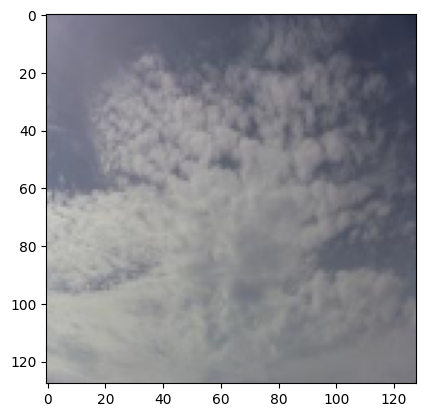

In [367]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

Data augmentation: 
* Generating more data by applying random transformations to original images
* Increase the size and diversity of the training set
* Improve model robustness Reduce overfitting

In [373]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

In [375]:
dataset_train = ImageFolder(
     "clouds/clouds_train",
     transform=train_transforms,
)

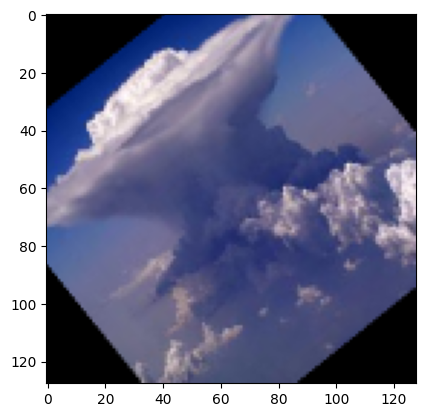

In [376]:
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor
image = image.squeeze().permute(1, 2, 0)
# Display the image
plt.imshow(image)
plt.show()

------------

# Convolutional Neural Networks

For a grayscale image of 256 x 256 pixels, there would be 65k model inputsm layer with 1000 neurons, and 65mil parameters

Linear layers (why not):
* slow training 
* overfitting 
* do not recofnize spacial patterns (recognizes the cat, but won't recognize it if it is in a different location) 

**Convolutional layers**: 
* parameters are collected in one or more small grids (**filters**)
* filters slide over the input, performing convolution operations at each position to create a **feature map**
* feature map preserves spacial patters and uses less parameters 
* one filter = one feature map 
* apply activations to feature maps 
* all feature maps combined form the output

In [377]:
nn.Conv2d(3, 32, kernel_size=3)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))

**Convolution**:
* compute the dot product (scalar product) of input patch and filter 
* dot product is the `SUM(element-wise multiplication)`
* sum the result 

**Zero-padding**
* Add frames of zeros to convolutional layer's input
* Maintains spatial dimensions of the input and output tensors
* Ensures border pixels are treated equally to others

In [378]:
nn.Conv2d(
  3, 32, kernel_size=3, padding=1
)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

**Max-padding**:
* Slide non-overlapping window over input
* At each position, retain only the maximum value
* Used after convolutional layers to reduce spatial dimensions

In [379]:
nn.MaxPool2d(kernel_size=2)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

# Convolutional Neural Network 

In [380]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        """Feature extractor: (convolution, activation, pooling) x 2 and flattened)"""
        self.feature_extractor = nn.Sequential(
            # First two elements are inputs and output feature maps
            # Kernel size sets filter size (3x3)
            # This will output 32 filters
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            # This halves the width and height
            nn.MaxPool2d(kernel_size=2),
            # This will output 64 filters 
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            # Half width and height
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        
        # Single linear layer
        self.classifier = nn.Linear(64*16*16, num_classes)
    
    def forward(self, x):
        """Pass the input through feature extractor and classifier"""
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [381]:
train_transforms = transforms.Compose([
   transforms.RandomHorizontalFlip(),
   transforms.RandomRotation(45),
   transforms.RandomAutocontrast(),
   transforms.ToTensor(),
   transforms.Resize((128, 128))
])

In [386]:
dataset_train = ImageFolder(
  "clouds/clouds_train",
  transform=train_transforms,
)
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

In [ ]:
# Define the model
net = Net(num_classes=7)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Binary classification: **binary cross-entropy (BCE) loss**  
Multi-class classification: **cross-entropy loss**

In [382]:
criterion = nn.CrossEntropyLoss()

In [ ]:
net = Net(num_classes=7)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

----------

Data augmentation for training data

In [388]:
train_transforms = transforms.Compose([
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(45),
     transforms.RandomAutocontrast(),
     transforms.ToTensor(),
     transforms.Resize((64, 64)),
])

dataset_train = ImageFolder(
   "clouds/clouds_train",
   transform=train_transforms,
)

Data augmentation for test data 

In [391]:
# There is no augmentation because the model should predict a specific test image, not a random transformation of it
test_transforms = transforms.Compose([
     #
     # NO DATA AUGMENTATION AT TEST TIME
     #
     transforms.ToTensor(),
     transforms.Resize((64, 64)),
])

dataset_test = ImageFolder(
   "clouds/clouds_train",
   transform=test_transforms,
)

In multi-class classification: separate precision and recall for each class

* **Precision** - Fraction of correct positive predictions - Fraction of cumulus-predictions that were correct
* **Recall** - Fraction of all positive examples correctly predicted - Fraction of all cumulus examples correctly predicted

Averaging multi-class metrics:
With 7 classes, we have 7 precision and 7 recall scores We can analyze them per-class, or aggregate:
* **Micro average** -> global calculation -> based for imbalanced dataset
* **Macro average** -> mean of per-class metrics -> care about performance on small classes 
* **Weighted average** -> weighted mean of per-class metrics -> consider errors in larger classes as more important

In [392]:
from torchmetrics import Recall
recall_per_class = Recall(task="multiclass", num_classes=7, average=None)
recall_micro = Recall(task="multiclass", num_classes=7, average="micro")
recall_macro = Recall(task="multiclass", num_classes=7, average="macro")
recall_weighted = Recall(task="multiclass", num_classes=7, average="weighted")

**Recall** > **Precision** -> model is better at correctly identifying true positives than avoding false positives

----------

# Handling sequences

* Ordered in time or space
* Order of the data points contains dependencies between them
* Examples: 
    * Time series 
    * Text 
    * Audio waves 

Task: predict future electricity consumption based on past patterns

In [393]:
pd.read_csv('electricity_consump/electricity_test.csv')

,timestamp,consumption
0,2014-01-01 00:00:00,-0.932595
1,2014-01-01 00:15:00,-0.957931
2,2014-01-01 00:30:00,-0.932595
3,2014-01-01 00:45:00,-0.907259
4,2014-01-01 01:00:00,-0.881923
...,...,...
35035,2014-12-31 22:45:00,-0.070415
35036,2014-12-31 23:00:00,-0.045079
35037,2014-12-31 23:15:00,-0.045079
35038,2014-12-31 23:30:00,-0.045079


Creating sequences
* Sequence length = number of data points in one training example
* 24 × 4 = 96 -> consider last 24 hours Predict single next data point

In [394]:
import numpy as np

In [395]:
def create_sequences(df, seq_length):
    # xs is a list for inputs, ys is a list for targets 
    xs, ys = [], []
    # iterate over data frame 
    for i in range(len(df) - seq_length): # Ensure that there are enough sequence length data points
        # Define inputs 
        x = df.iloc[i:(i+seq_length), 1]
        # Define target
        y = df.iloc[i+seq_length, 1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
# Create training examples 
X_train, y_train = create_sequences(train_data, seq_length)
print(X_train.shape, y_train.shape)

In [ ]:
# Convert training examples to to a Torch Dataset
dataset_train = TensorDataset(
     torch.from_numpy(X_train).float(),
     torch.from_numpy(y_train).float(),
)

------------

# Recurrent Neural Networks 

Simple networks and convolutional networks are feed-forward netwroks   
RNNs have connections that point back 
Recurrent neuron: 
* Input `x` that passes through weights get biases added and then activated 
* Outputs:
    * Main output `y`
    * Hidden state `h`

Architectures: 
* **Sequence-to-sequence**
    * Pass sequence as input, use the entire output sequence 
    * Example: Real-time speech recognition
* **Sequence-to-vector**
    * Pass sequence as input, use only the last output 
    * Example: Text topic classification, Sentiment Analysis, One-step time series prediction
* **Vector-to-sequence**
    * Pass single input, use the entire output sequence 
    * Example: Text generation, Image captioning
* **Encoder-decoder**
    * Pass entire input sequence, only then start using output sequence 
    * Example: Machine translation, Many-step Forecast, Not-real-time speech recognition (Alexa, Google Assistant, etc.)

In [398]:
class Net(nn.Module):
     def __init__(self):
         super().__init__()
         self.rnn = nn.RNN(
             input_size=1,
             hidden_size=32,
             num_layers=2,
             batch_first=True,
         )
         self.fc = nn.Linear(32, 1)

     def forward(self, x):
         # Initialize first hidden state to zeros
         h0 = torch.zeros(2, x.size(0), 32)
         # Pass input and first hidden state through RNN layer
         out, _ = self.rnn(x, h0)
         # Select last RNN's output and pass it through linear layer
         out = self.fc(out[:, -1, :])
         return out

-------------

# Short-term memory problem

RNN cells maintain memory via hidden state  
This memory is very short-term  
Two more powerful cells solve the problem:  
* LSTM (Long Short-Term Memory) cell 
* GRU (Gated Recurrent Unit) cell -> simplified version of LSTM cells as it has only one hidden state

In [399]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # Define lstm layer
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        # Initialize long-term memory
        c0 = torch.zeros(2, x.size(0), 32)
        # Pass all inputs to lstm layer
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [400]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.gru = nn.GRU(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)  
        out = self.fc(out[:, -1, :])
        return out

-----------

Error:
$$prediction - target$$ 
Squared Error:
$${(prediction - target)}^2$$
Meann Squared Error:
$$avg[{(prediction - target)}^2]$$

Squaring the error:
* Ensures positive and negative errors don't cancel out
* Penalizes large errors more

In [401]:
criterion = nn.MSELoss()

# Expanding tensors

Recurrent layers expect input shape  
(`batch_size`, `seq_length`, `num_features`)   
We got (`batch_size`, `seq_length`)  
We must add one dimension at the end

In [ ]:
net = Net()
# Set up MSE loss
criterion = nn.MSELoss()
optimizer = optim.Adam(
  net.parameters(), lr=0.0001
)

for epoch in range(3):
    for seqs, labels in dataloader_train:
        # Reshape model inputs
        seqs = seqs.view(16, 96, 1)
        # Get model outputs
        outputs = net(seqs)
        # Compute loss
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [ ]:
# Define MSE metric
mse = torchmetrics.MeanSquaredError()

net.eval()
with torch.no_grad():
    for seqs, labels in dataloader_test:
        seqs = seqs.view(32, 96, 1)
        # Pass seqs to net and squeeze the result
        outputs = net(seqs).squeeze()
        mse(outputs, labels)

# Compute final metric value
test_mse = mse.compute()
print(f"Test MSE: {test_mse}")

-----------

# Multi-input Models

----------

# Text Processing Pipeling

1. Raw Data 
2. Preprocessing 
3. Encoding 
4. Dataset & Dataloader

In [419]:
# Import the necessary functions
from torchtext.data.utils import get_tokenizer
from nltk.probability import FreqDist

text = "In the city of Dataville, a data analyst named Alex explores hidden insights within vast data. With determination, Alex uncovers patterns, cleanses the data, and unlocks innovation. Join this adventure to unleash the power of data-driven decisions."

# Initialize the tokenizer and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)

threshold = 1
# Remove rare words and print common tokens
freq_dist = FreqDist(tokens)
common_tokens = [token for token in tokens if freq_dist[token] > threshold]
print(common_tokens)

['the', 'of', ',', 'data', 'alex', 'data', '.', ',', 'alex', ',', 'the', 'data', ',', '.', 'the', 'of', '.']


In [421]:
# Initialize and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)
print(tokens)

['in', 'the', 'city', 'of', 'dataville', ',', 'a', 'data', 'analyst', 'named', 'alex', 'explores', 'hidden', 'insights', 'within', 'vast', 'data', '.', 'with', 'determination', ',', 'alex', 'uncovers', 'patterns', ',', 'cleanses', 'the', 'data', ',', 'and', 'unlocks', 'innovation', '.', 'join', 'this', 'adventure', 'to', 'unleash', 'the', 'power', 'of', 'data-driven', 'decisions', '.']


In [ ]:
# Remove any stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print(filtered_tokens)

In [ ]:
# Perform stemming on the filtered tokens
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)

In [44]:
y = 1
num_classes = 3

# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0, 1, 0])

# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y), num_classes)

In [ ]:
Cross entropy loss is the most used loss for classification problems.

In [ ]:
Gradient is the term for the derivative in deep learning 

Some functions, such as the one on the left, have one minimum and one only, called the "global" minimum. These functions are "convex". Some, "non-convex" functions have more than one "local" minimum. At a local minimum, the function value is lowest compared to nearby points, but points further away may be even lower. When minimizing loss functions, our goal is to find the global minimum of the non-convex function, here, when x is approximately one.

In [ ]:
criterion = nn.CrossEntropyLoss()

# Calculate the loss
loss = criterion(preds, target)

# Compute the gradients of the loss
loss.backward()

# Display gradients of the weight and bias tensors in order
print(weight.grad)
print(bias.grad)

In [48]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Sigmoid(),
                      nn.Linear(8, 2))

# Access the weight of the first linear layer
weight_0 = model[0].weight

# Access the bias of the second linear layer
bias_1 = model[2].bias

In [ ]:
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

# Access the gradients of the weight of each linear layer
grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad

In [ ]:
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

# Access the gradients of the weight of each linear layer
grads0 = model[0].weight.grad
grads1 = model[1].weight.grad
grads2 = model[2].weight.grad

# Update the weights using the learning rate and the gradients
weight0 = weight0 - lr * grads0
weight1 = weight1 - lr * grads1
weight2 = weight2 - lr * grads2

In [ ]:
SGD - Stochastic Gradient Descend

In [ ]:
# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss = criterion(pred, target)
loss.backward()

# Update the model's parameters using the optimizer
optimizer.step()

------

In [52]:
# The mean squared error loss (MSE loss) is the squared difference between the prediction and the ground truth.
def mean_squared_loss (prediction, target):
    return np.mean((prediction - target)**2)

In [ ]:
epoch -> looping through the entrie dataset once 

In [ ]:
Using the MSELoss
Recall that we can't use cross-entropy loss for regression problems. The mean squared error loss (MSELoss) is a common loss function for regression problems. In this exercise, you will practice calculating and observing the loss using NumPy as well as its PyTorch implementation.

The torch package has been imported as well as numpy as np and torch.nn as nn.

In [53]:
y_hat = np.array(10)
y = np.array(1)

# Calculate the MSELoss using NumPy
mse_numpy = np.mean((y_hat - y)**2)

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_hat).float(), torch.tensor(y).float())
print(mse_pytorch)

tensor(81.)


In [ ]:
# Loop over the number of epochs and then the dataloader
for i in range(num_epochs):
  for data in dataloader:
    # Set the gradients to zero
    optimizer.zero_grad()

In [ ]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
  for data in dataloader:
    # Set the gradients to zero
    optimizer.zero_grad()
    # Run a forward pass
    feature, target = data
    prediction = model(feature)    
    # Calculate the loss
    loss = criterion(prediction, target)    
    # Compute the gradients
    loss.backward()

In [ ]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
  for data in dataloader:
    # Set the gradients to zero
    optimizer.zero_grad()  
    # Run a forward pass
    feature, target = data
    prediction = model(feature)    
    # Calculate the loss
    loss = criterion(prediction, target)    
    # Compute the gradients
    loss.backward()
    # Update the model's parameters
    optimizer.step()
show_results(model, dataloader)

Together, we have discovered two activation functions: the sigmoid and the softmax functions. These activation functions are usually applied on the last linear layer of a model. There are other activation functions used between linear layers.

In [ ]:
# ReLU - Rectified Linear Unit 

In [57]:
relu = nn.ReLU()

In [58]:
leaky_relu = nn.LeakyReLU(negative_slope=0.05)

------------

# Keras 

• Deep Learning Framework  
• Enables fast experimentation  
• Runs on top of other frameworks  
• Fast industry-ready models  
• For beginners and experts  
• Less code  
• Build any architecture  
• Deploy models in multiple platforms  

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.

In [3]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
# Keras Dense == PyTorch Linear
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile your model
# Optimizer - updates the weights during backpropagation 
# Loss -  target to minimize during training
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

In [ ]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)